In [1]:
import os
import sys
# Determine the project root directory (adjust the path as necessary)
project_root = os.path.abspath(os.path.join(os.getcwd(), '../../../../..'))
print(project_root)
sys.path.append(project_root)

c:\Users\Thomas Gausmann\sciebo - Gausmann, Thomas (t_gaus04@uni-muenster.de)@uni-muenster.sciebo.de\Masterarbeit\price_simulator


In [3]:

import price_simulator.src.utils.analyzer as Analyzer
from price_simulator.src.utils.visualizer import create_subplot
#from price_simulator.src.algorithm.agents.approximate import DiffDQN
from price_simulator.src.algorithm.agents.simple import AlwaysDefectAgent, TitForTat
from price_simulator.src.algorithm.agents.tabular import Qlearning
from price_simulator.src.algorithm.demand import LogitDemand
from price_simulator.src.algorithm.environment import DiscreteSynchronEnvironment
from price_simulator.src.algorithm.policies import DecreasingEpsilonGreedy
from price_simulator.src.algorithm.agents.lstm_agent import SimpleLSTMAgent  # Import the new LSTM agent

Period 0/1000
Loss: 0.002428733976557851, Target: 0.30154971783425866, Local Estimates: 0.11068063974380493
Loss: 0.5971543788909912, Target: 1.6822949181806521, Local Estimates: -1.3105823993682861
Loss: 0.03654051572084427, Target: 1.2518549333822206, Local Estimates: 0.5115119218826294
Loss: 6.295238971710205, Target: 6.157528400471473, Local Estimates: -3.559908151626587
Loss: 1.4311795234680176, Target: 5.5173237166114335, Local Estimates: 0.8839993476867676
Loss: 2.5374271869659424, Target: 5.853037151591227, Local Estimates: -0.3163555860519409
Loss: 7.568085193634033, Target: 4.525955709711955, Local Estimates: 15.18059253692627
Loss: 1.5951619148254395, Target: 4.1888415455277475, Local Estimates: -0.7027260661125183
Loss: 0.3892316520214081, Target: 2.955992571630823, Local Estimates: 0.5396988987922668
Loss: 1.2072738409042358, Target: 4.76786753574574, Local Estimates: 0.5123879909515381
Loss: 0.9330574870109558, Target: 5.746632134860329, Local Estimates: 2.005527734756469

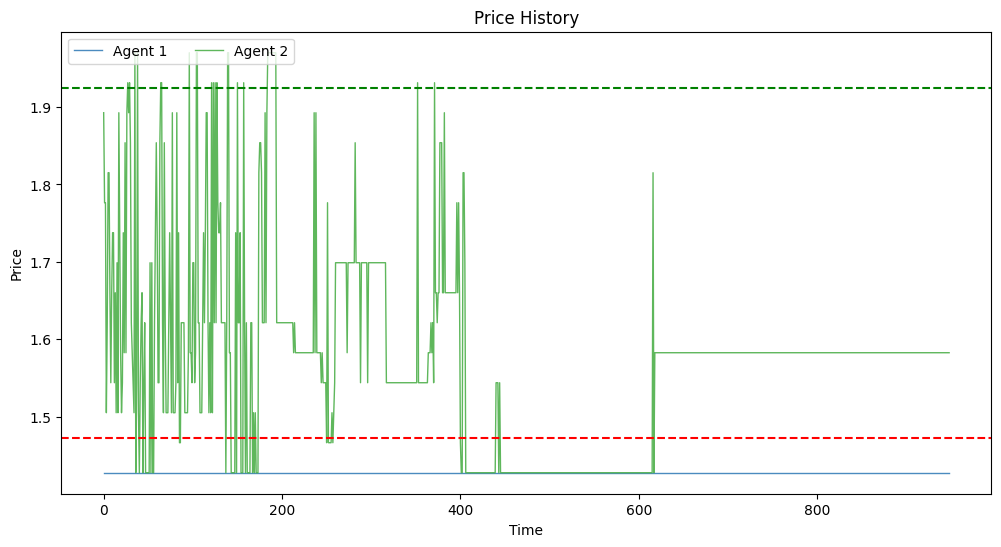

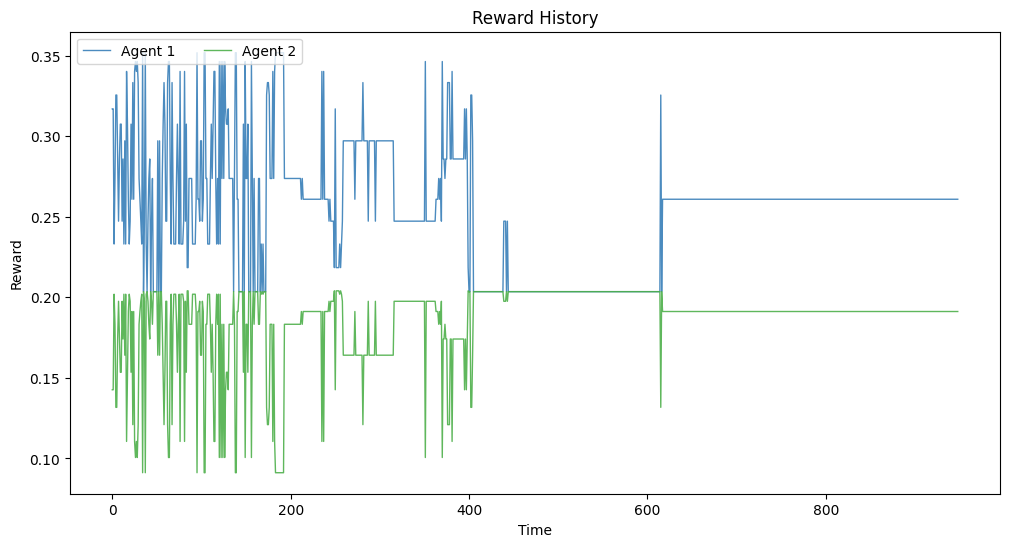

In [13]:
def run():
    dqn_env = DiscreteSynchronEnvironment(
        markup=0.1,
        n_periods=1000,
        possible_prices=[],
        n_prices=15,
        demand=LogitDemand(outside_quality=0.0, price_sensitivity=0.25),
        history_after=50,
        agents=[
            TitForTat(
                
            ),
            SimpleLSTMAgent(
                discount=0.95, learning_rate=0.125, decision=DecreasingEpsilonGreedy(), marginal_cost=1.0, quality=2.0, sequence_length=5
            )
        ],
    )
    dqn_env.play_game()
    Analyzer.analyze(dqn_env)
    import matplotlib.pyplot as plt

    print("Reward History:", dqn_env.reward_history)

    # Plot price history
    price_history_1 = [price[0] for price in dqn_env.price_history]
    price_history_2 = [price[1] for price in dqn_env.price_history]
    plt.figure(figsize=(12, 6))
    create_subplot([price_history_1, price_history_2], label='Price')
    plt.axhline(y=dqn_env.nash_prices[0], color='r', linestyle='--', label='Nash Price')
    plt.axhline(y=dqn_env.monopoly_prices[0], color='g', linestyle='--', label='Monopoly Price')
    plt.title('Price History')
    plt.xlabel('Time')
    plt.ylabel('Price')
    plt.show()

    # Plot reward history
    reward_history_1 = [reward[0] for reward in dqn_env.reward_history]
    reward_history_2 = [reward[1] for reward in dqn_env.reward_history]
    plt.figure(figsize=(12, 6))
    create_subplot([reward_history_1, reward_history_2], label='Reward')
    plt.title('Reward History')
    plt.xlabel('Time')
    plt.ylabel('Reward')
    plt.show()

run()